# Introduction to Machine Learning - Classification and Prediction

In this post the main objectives for Machine Learning and some of the key concepts will be introduced. You will learn:
* How is the Machine Learning paradigm different from other programming approaches.
* Difference of classification vs prediction problems.
* How to define a machine learning problem and how to split the data available between training and testing.
* How to compare different models.
* Underfitting and overfitting and the balance between bias and variance.

## How is Machine Learning different from traditional algorithms?

In a traditional algorithm, given a set of inputs, a computer program will follow a set of (in general deterministic) steps to reach out a solution. So in more formal terms, given an ${x}$, a vector of inputs, we get to our best estimate $\hat{y}$ of the ground truth $y$ by applying the function $f$:

> $f(x) = \hat{y}$

where $f$ represents the algorithm that we have implemented.

In traditional supervised learning cases, the goal is to *learn* $f()$ given enough observations of both ${x}$ and $y$. This difference is very important, so let's take a second to ponder on that. In traditional algorithms, you write $f()$ so once you are given $x$, you produce $\hat{y}$ (which is your estimation of $y$). In Statistical Leaning, you are given a set of $x$ **and $y$** so you produce $f()$ and when given new data ${x}\prime$ you can generate $\hat{y}$.

This might sound all a bit theoretical, so lets try to make it more concrete. Imagine you get tasked by a scientist to classify flowers in 3 categories, based on certain inputs (or in the ML lingo **features**). He has even collected data from his past analysis and would like to automate this classification.

Using traditional algorithms, one would end up with a series of `if then else` statements to end up classifying the flowers based on those inputs. While this approach might work when we manage to uncover the relationships between these features and the classes and when the number of *features* is not too large, it becomes very quickly difficult to implement when the relationships between the features and the output are not that clear and when the number of features increases.

In contrast, with a Statistical Learning algorithm, we will feed it with a battery of examples of inputs and outputs and eventually (and hopefully!) the algorithm learn the importance of these factors and how to combine them to get to the correct answer.

## Classification vs Prediction

Two of the biggest families of problems in the supervised learning world are *classification* and *prediction* ones (although the purists will argue that there is no classification, as a classification problem is a prediction one, where the prediction universe is a *categorical* one).

Again, let's go for an example. If you are trying to separate data into different groups or categories, you are dealing with a classification problem (for example, given some flower details decide what type of flower it is, given an email classify it as spam or non-spam or given a picture, classify it as a dog or a cat).

On the other hand, if your aim is to anticipate client demand or to predict the price of a house given certain information, you are dealing with a prediction problem. It is important to understand this as the family of algorithms to model those that you might end up using will be different.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from plotnine import *
import itertools

In [2]:
iris_data = datasets.load_iris()
iris_features, iris_classes = iris_data['data'], iris_data['target']
iris_df = pd.DataFrame(iris_features)
iris_df['classification'] = iris_classes
iris_df.rename({0: 's_lenght', 1: 's_width', 2: 'p_length', 3: 'p_width'}, inplace=True, axis=1)
iris_df['classification'] = iris_df['classification'].astype('category')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


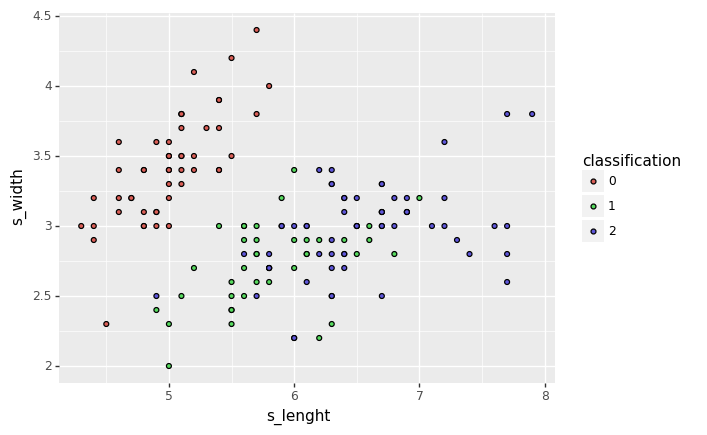

<ggplot: (8754541070825)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


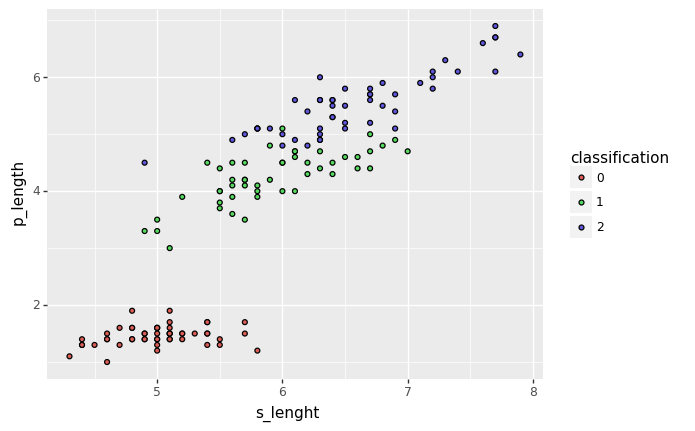

<ggplot: (8754541116105)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


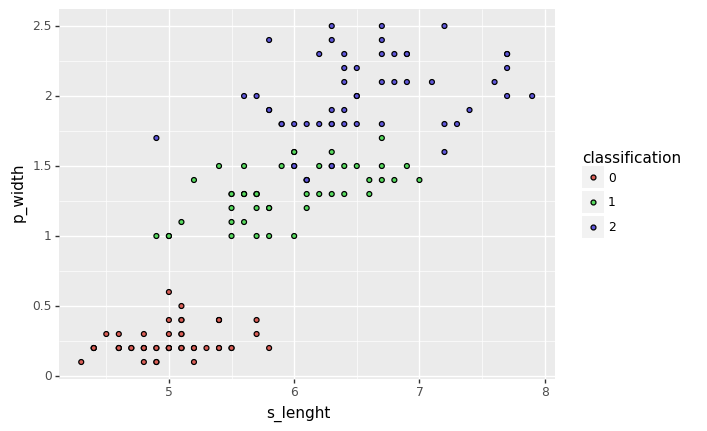

<ggplot: (8754539439137)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


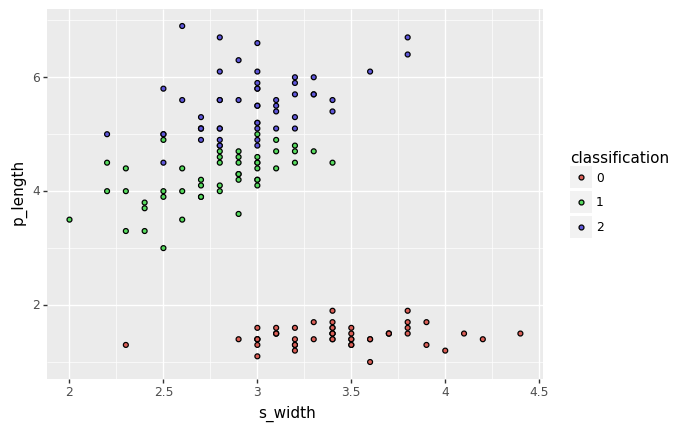

<ggplot: (8754539459597)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


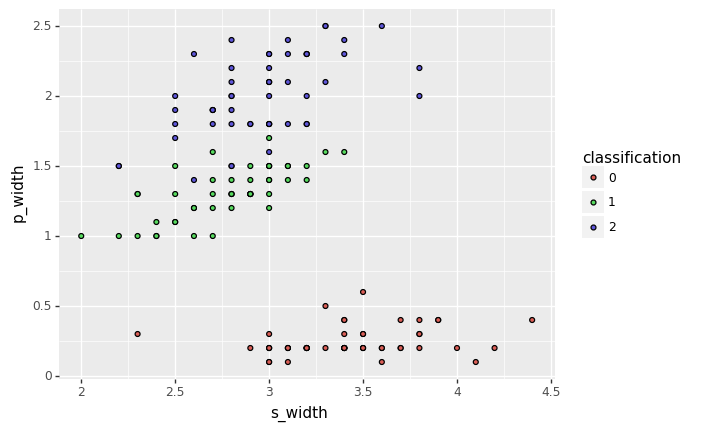

<ggplot: (8754539782173)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


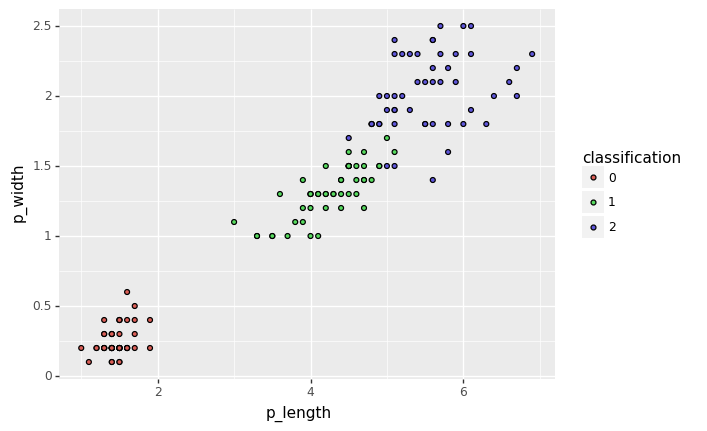

<ggplot: (8754539327677)>

In [4]:
for axis1, axis2 in itertools.combinations(iris_df.columns[:-1], 2):
  display(ggplot(iris_df, aes(x=axis1, y=axis2, fill='classification')) + geom_point())

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('classification', 1), iris_df['classification'], test_size=0.4, random_state=42)

In [11]:
classifiers = {'K-Nearest Neighbors': KNeighborsClassifier(3),
               'Logistic Regression': LogisticRegression(),
               'SVM Linear kernel': SVC(kernel="linear", C=0.025),
               'SVM': SVC(gamma=2, C=1),
               'Decission Tree': DecisionTreeClassifier(max_depth=5),
               'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
               'AdaBoost': AdaBoostClassifier(),
               'GBM': GradientBoostingClassifier(n_estimators=10),
               'XGBoost': XGBClassifier(n_estimators=10)}

results = {'model':[], 'accuracy_train':[], 'accuracy_test':[]}

for name, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  train_score = classifier.score(X_train, y_train)
  test_score = classifier.score(X_test, y_test)
  results['model'].append(name)
  results['accuracy_train'].append(train_score)
  results['accuracy_test'].append(test_score)

In [23]:
results_df = pd.DataFrame(results)
format_dict = {'accuracy_train': '{:.2%}', 'accuracy_test': '{:.2%}'}
results_df.style.format(format_dict)
display(results_df)

,model,accuracy_train,accuracy_test
0,K-Nearest Neighbors,0.955556,0.983333
1,Logistic Regression,0.955556,1.000000
2,SVM Linear kernel,0.922222,1.000000
3,SVM,0.977778,1.000000
4,Decission Tree,0.988889,0.966667
5,Random Forest,0.988889,0.983333
6,AdaBoost,0.955556,0.933333
7,GBM,0.988889,1.000000
8,XGBoost,0.955556,1.000000


In [10]:
boston_data = datasets.load_boston()
boston_df = pd.DataFrame(boston_data['data'])
boston_df.columns = boston_data['feature_names']
boston_df['target'] = boston_data['target']

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
from matplotlib import pyplot

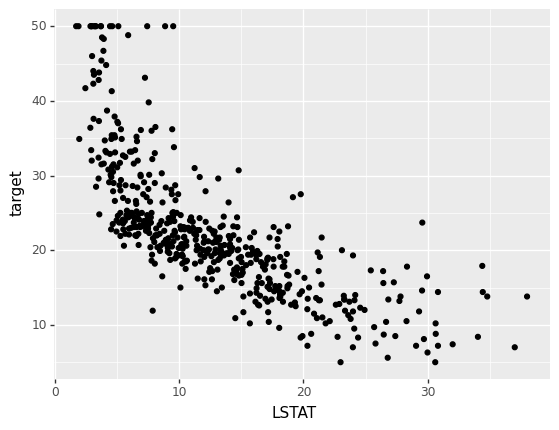

<ggplot: (8749825082681)>

In [24]:
ggplot(boston_df, aes(x='LSTAT', y='target')) + geom_point()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('target', 1), boston_df['target'], test_size=0.4, random_state=42)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


K-Nearest Neighbors


Linear Regression


SVR Linear


SVR RBF


Decission Tree


Random Forest


AdaBoost


GBM


XGBoost
[09:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


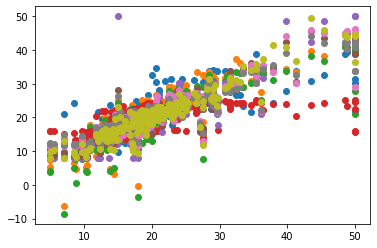

In [46]:
from matplotlib import pyplot

regressors = {'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
              'Linear Regression': LinearRegression(),
              'SVR Linear': SVR(kernel='linear'),
              'SVR RBF': SVR(kernel='rbf'),
              'Decission Tree': DecisionTreeRegressor(max_depth=5),
              'Random Forest': RandomForestRegressor(max_depth=5, n_estimators=20),
              'AdaBoost': AdaBoostRegressor(),
              'GBM': GradientBoostingRegressor(n_estimators=20),
              'XGBoost': XGBRegressor(n_estimators=100)}

results = {'model':[], 'accuracy_train':[], 'accuracy_test':[]}

for name, regressor in regressors.items():
  print(name)
  regressor.fit(X_train, y_train)
  train_score = regressor.score(X_train, y_train)
  test_score = regressor.score(X_test, y_test)
  yhat = regressor.predict(X_test)
  scatter = pyplot.scatter(y_test, yhat)
  display(scatter)
  results['model'].append(name)
  results['accuracy_train'].append(train_score)
  results['accuracy_test'].append(test_score)

In [41]:
results_regression_df = pd.DataFrame(results)
format_dict = {'accuracy_train': '{:.2%}', 'accuracy_test': '{:.2%}'}
results_regression_df.style.format(format_dict)
display(results_regression_df)

,model,accuracy_train,accuracy_test
0,K-Nearest Neighbors,0.621195,0.552343
1,Linear Regression,0.747200,0.712514
2,SVR Linear,0.709390,0.668472
3,SVR RBF,0.178317,0.240108
4,Decission Tree,0.936638,0.751590
5,Random Forest,0.923696,0.844382
6,AdaBoost,0.911834,0.792974
7,GBM,0.912338,0.827823
8,XGBoost,0.976873,0.877977
